# Kaden Buffaloe and Tyson Merrill

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)



https://www.kaggle.com/datasets/abhayayare/employee-data-simulation-it-industry

# Background and Business Problem



In the competitive IT job market, understanding the relationship between years of experience and salary is crucial for both employers and employees. Companies need data-driven insights to ensure fair compensation, retain top talent, and attract skilled professionals, while employees seek transparency in salary expectations as they progress in their careers.

Our analysis aims to answer key questions:

- How strongly does experience influence salary in IT roles? 
- Does the data indicate salary plateaus after a certain number of years?
- Can a predictive model help estimate fair salaries based on experience?


By conducting exploratory data analysis and building predictive models, we aim to provide evidence-based salary benchmarks that can be used for HR decision-making, salary negotiations, and workforce planning in the IT sector.

# Load In Data and Select Columns For Analysis

In [2]:
#load in the dataset and display heading 
employee = pd.read_csv("../../01_project/DATA/employee_data.csv")
employee.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [3]:
#Establish our variables to use in the analysis 
employee_trimmed = employee[['Experience (Years)', 'Salary']].dropna()
employee_trimmed = employee_trimmed.rename(columns = {'Experience (Years)': 'exp_yr', 'Salary': 'salary'})

employee_trimmed.head()

,exp_yr,salary
0,4,109976
1,6,120088
2,17,181301
3,7,77530
4,13,152397


# Exploratory Data Analysis


In [4]:
#See what the summary of our data is looking like
employee_trimmed.describe()

,exp_yr,salary
count,400.000000,400.00000
mean,9.670000,131701.19750
std,6.101571,43351.50899
min,0.000000,43643.00000
25%,4.000000,100484.75000
50%,10.000000,128561.50000
75%,15.000000,157735.00000
max,20.000000,269950.00000


- One thing that I noticed is that we have a very large standard deviation for years and for salary, this might suggest some outliers or a lot of variance in the data that we have. 
- The medain salary ($128,561.50) falls below the average salary sugesting large outliers that are pulling the data and creating the skew that we are seeing. This suggests that we may need to take position into account in future analysis, as senior positions may be much higher paying

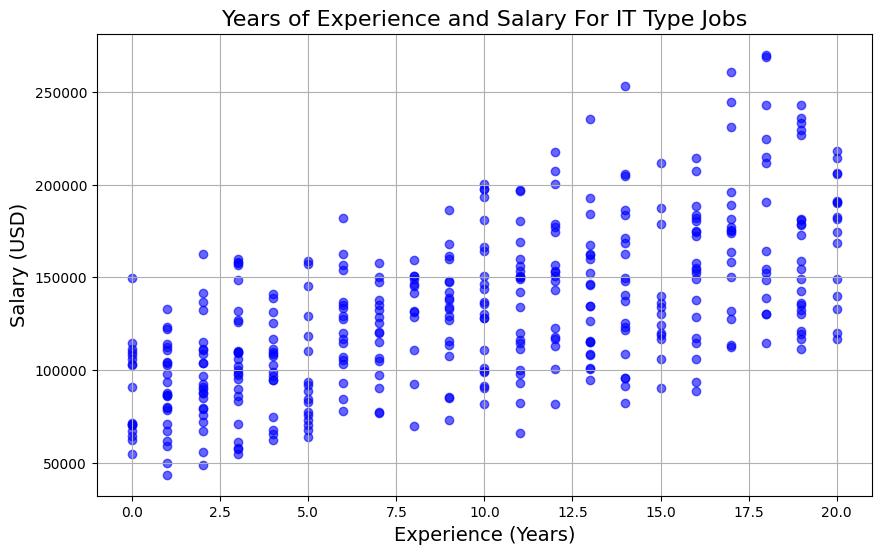

In [5]:
# Create a scatterplot to view initial relationship
plt.figure(figsize=(10, 6))
plt.scatter(employee_trimmed['exp_yr'], employee_trimmed['salary'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(True)
plt.show()

- Before applying any sort transformations it appears that we have a moderately strong, positve, and linear realtionship between how much experience an IT employee has and their salary. 

array([[<Axes: title={'center': 'exp_yr'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

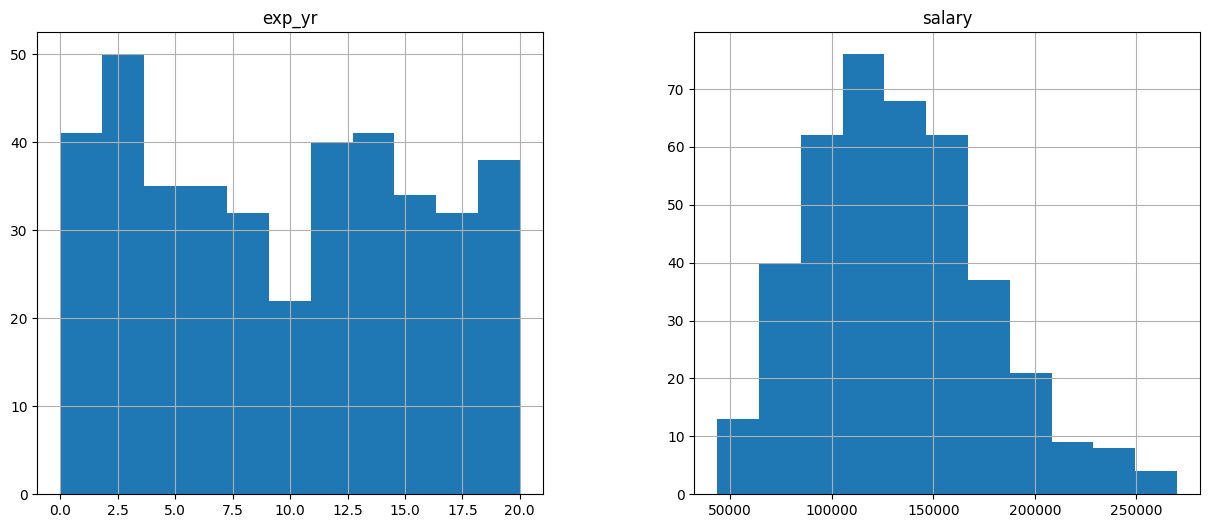

In [6]:
# explore how normally distributed our variables are currently so we have an idea if we will need to transform them later
employee_trimmed.hist(figsize=(15, 6), bins = 11)

In [7]:
#our distirubtion of salary is right skewed so we will perform a transformation to see if this fixes our distributions 
employee_trimmed['salary_sqrt'] = np.sqrt(employee_trimmed['salary'])
employee_trimmed['salary_log'] = np.log(employee_trimmed['salary']+1)

employee_trimmed['exp_yr_sqrt'] =  np.sqrt(employee_trimmed['exp_yr'])
employee_trimmed['exp_yr_log'] =  np.log(employee_trimmed['exp_yr'] +1)

array([[<Axes: title={'center': 'exp_yr'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_sqrt'}>,
        <Axes: title={'center': 'salary_log'}>],
       [<Axes: title={'center': 'exp_yr_sqrt'}>,
        <Axes: title={'center': 'exp_yr_log'}>]], dtype=object)

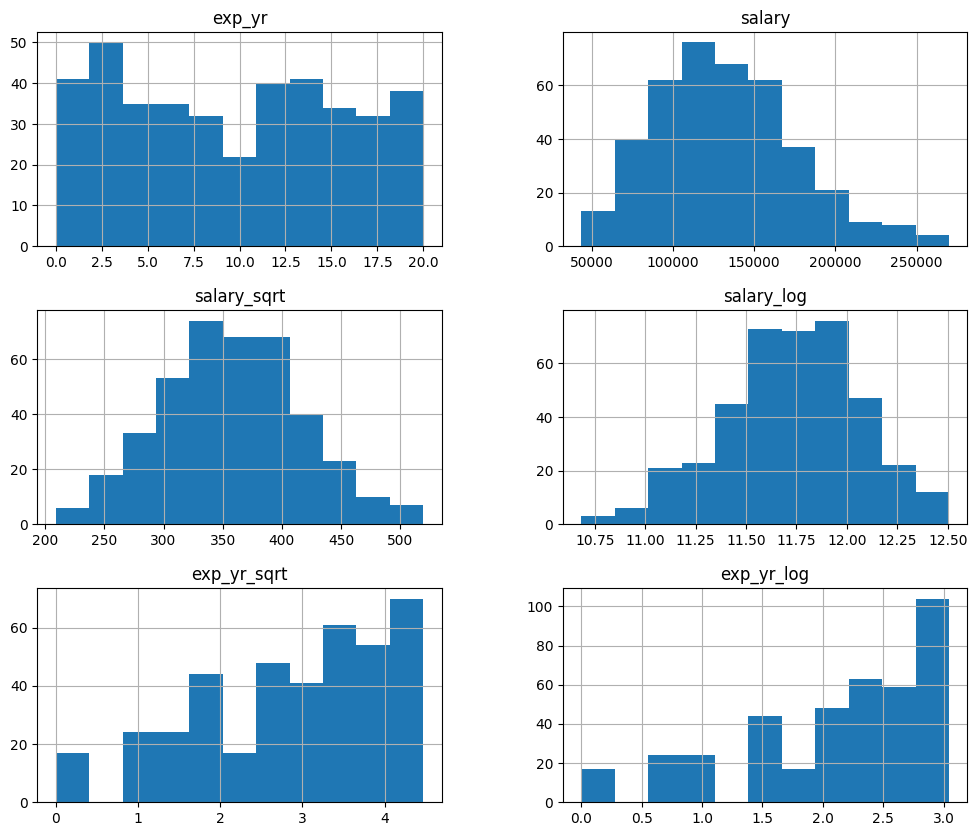

In [8]:
employee_trimmed.hist(figsize=(12, 10), bins = 11)

 - It looks like the square root of salary appears to be the more normally distributed and therefore if we need to perform any transformations later on this will be a good point for us to start at. Transforming exp_yr did not appear to do anything.

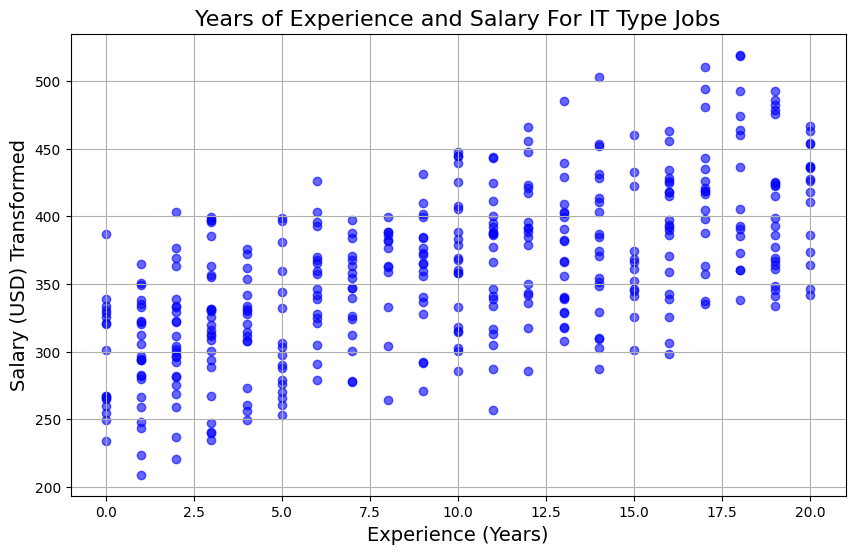

In [9]:
# Create a scatterplot for salary_sqrt and exp_yr
plt.figure(figsize=(10, 6))
plt.scatter(employee_trimmed['exp_yr'], employee_trimmed['salary_sqrt'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary (USD) Transformed', fontsize=14)
plt.grid(True)
plt.show()

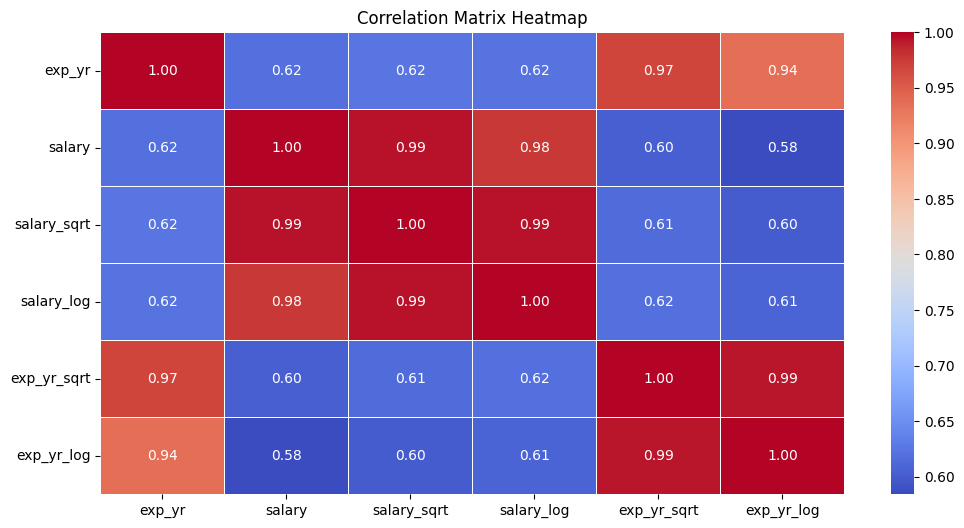

In [10]:
# Compute the correlation matrix
corr_matrix = employee_trimmed.corr()

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



- Based off of the heatmap showing the correlations between our transformed salary variable and the exp_yr there is really no differerence in our coeffience (.62) for all combinations (sqrt, log, or normal). For this reason we will attempt to perform the simple linear regression with the normal raw data first and go from their. 

# Perform Simple Linear Regression


In [11]:
#Perform the Simple linear regression 
# Prepare data
y = employee_trimmed['salary']
X = sm.add_constant(employee_trimmed['exp_yr'])

In [12]:
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.36e-43
Time:                        12:05:56   Log-Likelihood:                -4741.5
No. Observations:                 400   AIC:                             9487.
Df Residuals:                     398   BIC:                             9495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.921e+04   3198.586     27.889      0.0

In [15]:
#add the residuals and the fitted values to our wind DF
employee_trimmed['residuals_raw'] = res.resid
employee_trimmed['fittedvalues_raw'] = res.fittedvalues
employee_trimmed.head()

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,residuals_raw,fittedvalues_raw
0,4,109976,331.626296,11.608027,2.000000,1.609438,3192.405143,106783.594857
1,6,120088,346.537155,11.695988,2.449490,1.945910,4515.127314,115572.872686
2,17,181301,425.794551,12.107919,4.123106,2.890372,17387.099260,163913.900740
3,7,77530,278.442095,11.258433,2.645751,2.079442,-42437.511600,119967.511600
4,13,152397,390.380584,11.934251,3.605551,2.639057,6061.654916,146335.345084


C:\Users\ksbuf\AppData\Local\Temp\ipykernel_31080\888221857.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res.params[0] + res.params[1] * employee_trimmed['exp_yr'],


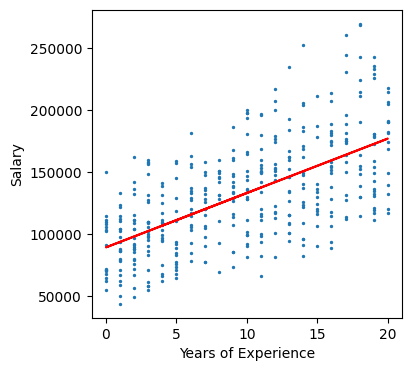

In [18]:
#Add the OLS line to our original scatter plot to see how it fits

fig = plt.figure(figsize = (4, 4))
plt.scatter(employee_trimmed['exp_yr'], 
            y, 
            s = 2)
plt.plot(employee_trimmed['exp_yr'], 
         res.params[0] + res.params[1] * employee_trimmed['exp_yr'], 
         'r') 
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

## Check all Assumptions

### Add Specific Assumptions Here and add more as needed  BE SURE TO INCLUDE INTERPRETATIONS OF EACH

In [14]:
#Linearity between our X and Y

## Apply transformations and recheck assumptions

### Add Specific Assumptions Here and add more as needed BE SURE TO INCLUDE INTERPRETATIONS OF EACH

# Model Assesment

### $R^2$

### F - Test

### RMSE

### MAE

# Statistical inference

### Confidence Intervals - Slope and Intercepts

### Hypothesis Testing - SLope

### confidence interval for the mean of $Y$


### Prediction Interval For An Individual Observation